# IGRINS CA1 foreshortening term

The blaze envelope depends on the foreshortened width of the beam.  Here we explore two scenarios--- the illuminated length of the groove and the foreshortened groove opening.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'

### Fixed physical properties

Groove pitch, the distance from groove-to-groove.

In [2]:
sigma = 27.36 # micron

The groove top width, unique to Si grating development.

In [3]:
groove_top_width = 9.95 # micron

The angle $a$ is the fixed $70.53^\circ$ from the Si crystal planes, $b$ is $\arctan{3}$, and c is whatever is left over to add up to 180.

In [4]:
blaze_angle = np.degrees(np.arctan(3)) # Blaze angle

In [5]:
incidence_angle = 68.2

## Compute the "length of the illuminated groove"

See the previous notebook for how we worked this out.

In [6]:
def illuminated_groove_size(sigma, groove_top_width, blaze_angle, incidence_angle):
    """ The size of the illuminated groove
    
    Parameters:
    -----------
    sigma: The groove spacing or groove pitch (micron)
    groove_top_width: The groove top or 'dam' unique to Si grating
        development, they cause shadowing (micron)
    blaze_angle: The blaze angle, as measured from the 
        grating normal (degrees)
    incidence_angle: The input angle, as measured from the 
        grating normal (degrees)
    """
    
    a_degrees = 70.53 # "Fixed" Si crystal plane angle
    b_degrees = blaze_angle
    c_degrees = 180 - a_degrees - b_degrees # Complement must add up to 180
    a_radians, b_radians, c_radians = (np.radians(angle) for angle in 
                                   [a_degrees, b_degrees, c_degrees])
    A_micron = sigma - groove_top_width
    
    # Apply the law of sines:
    fixed_ratio = np.sin(a_radians) / A_micron
    B_micron = np.sin(b_radians) / fixed_ratio
    C_micron = np.sin(c_radians) / fixed_ratio
    
    
    incidence_angle_radians = np.radians(incidence_angle)
    
    gamma_degrees = 90 - incidence_angle
    gamma_radians = np.radians(gamma_degrees)
    
    phi_degrees = 180 - b_degrees - gamma_degrees
    phi_radians = np.radians(phi_degrees)
    
    h_micron = A_micron * np.sin(gamma_radians)/np.sin(phi_radians)
    
    if h_micron < C_micron:
        return h_micron
    else:
        return C_micron

### Compute the "beam waist"

The slit itself undergoes a projection effect, where the single-slit diffraction pattern appears to get foreshortened.  Let's compute that too.

In [7]:
def beam_waist(sigma, groove_top_width, incidence_angle):
    """ The size of the illuminated groove
    
    Parameters:
    -----------
    sigma: The groove spacing or groove pitch (micron)
    groove_top_width: The groove top or 'dam' unique to Si grating
        development, they cause shadowing (micron)
    incidence_angle: The input angle, as measured from the 
        grating normal (degrees)
    """
    
    A_micron = sigma - groove_top_width
    incidence_angle_radians = np.radians(incidence_angle)
    
    output = A_micron * np.cos(incidence_angle_radians)
    return output

In [8]:
incidence_angles = np.arange(0, 89.9, 0.2)

In [9]:
h_values = [illuminated_groove_size(sigma, groove_top_width, blaze_angle, incidence_angle) for incidence_angle in incidence_angles]
w_values = [beam_waist(sigma, groove_top_width, incidence_angle) for incidence_angle in incidence_angles]

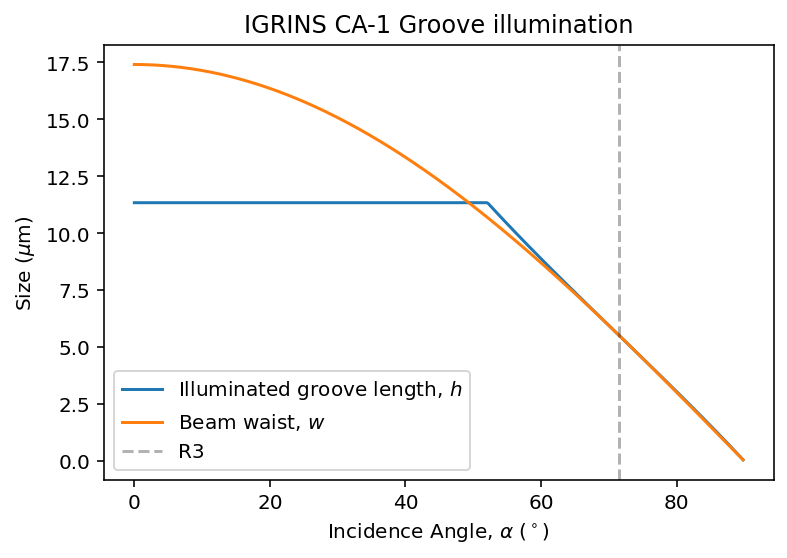

In [10]:
plt.plot(incidence_angles, h_values, label = 'Illuminated groove length, $h$');
plt.plot(incidence_angles, w_values, label = 'Beam waist, $w$');
plt.xlabel(r'Incidence Angle, $\alpha$ $(^\circ)$')
plt.ylabel('Size $(\mu\mathrm{m})$')
plt.title('IGRINS CA-1 Groove illumination')
plt.axvline(blaze_angle, color='k', linestyle='dashed', 
            alpha=0.3, label='R3')
plt.legend();

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

plt.savefig('../../figures/IGRINS_CA1_R3_groove_illumination.png')

All done!  Yay!